<a href="https://colab.research.google.com/github/sdding/LG-AI-SmartFactory/blob/main/LG_AImers2_SmFc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Info.

#### train.csv [파일]  
* PRODUCT_ID : 제품의 고유 ID  
* Y_Class : 제품 품질 상태(Target)   
  * 0 : 적정 기준 미달 (부적합)  
  * 1 : 적합  
  * 2 : 적정 기준 초과 (부적합)  
* Y_Quality : 제품 품질 관련 정량적 수치  
* TIMESTAMP : 제품이 공정에 들어간 시각  
* LINE : 제품이 들어간 공정 LINE 종류 ('T050304', 'T050307', 'T100304', 'T100306', 'T010306', 'T010305' 존재)  
* PRODUCT_CODE : 제품의 CODE 번호 ('A_31', 'T_31', 'O_31' 존재)  
* X_1 ~ X_2875 : 공정 과정에서 추출되어 비식별화된 변수  


#### test.csv [파일]  
* PRODUCT_ID : 제품의 고유 ID  
* TIMESTAMP : 제품이 공정에 들어간 시각  
* LINE : 제품이 들어간 공정 LINE 종류 ('T050304', 'T050307', 'T100304', 'T100306', 'T010306', 'T010305' 존재)  
* PRODUCT_CODE : 제품의 CODE 번호 ('A_31', 'T_31', 'O_31' 존재)  
* X_1 ~ X_2875 : 공정 과정에서 추출되어 비식별화된 변수  


※ 실제 공정 과정에서의 데이터로, 보안상의 이유로 일부 변수가 비식별화 처리 되었습니다. (X변수)  
'LINE', 'PRODUCT_CODE'는 Train / Test 모두 동일한 종류가 존재합니다.

## Import

In [2]:
import random
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37) # Seed 고정

## Data

In [4]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [5]:
train_df.head()

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN


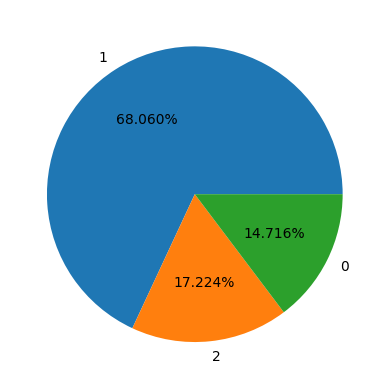

Y_Class
1    407
2    103
0     88
Name: count, dtype: int64


In [6]:
# 타겟값 비율
ratio = train_df['Y_Class'].value_counts()
plt.pie(ratio, labels=[1,2,0], autopct='%.3f%%')
plt.show()

print(ratio)

#### LINE별 PRODUCT_CODE별 통계
* LINE 6개   
T050304, T050307, T100304, T100306, T010306, T010305  
* PRODUCT_CODE 3개   
T_31, A_31, O_31

T010306 -- A_31  
T010305 -- A_31  
T050304 -- A_31  
T050307 -- A_31  
T100304 -- O_31, T_31  
T100306 -- O_31, T_31  

In [7]:
# 라인별 | 제품코드별 데이터 수
print(train_df['LINE'].value_counts())
print()
print(train_df['PRODUCT_CODE'].value_counts())

LINE
T100304    175
T100306    174
T050304     78
T010306     70
T010305     59
T050307     42
Name: count, dtype: int64

PRODUCT_CODE
T_31    343
A_31    249
O_31      6
Name: count, dtype: int64


In [8]:
train_df.groupby(['LINE','PRODUCT_CODE','Y_Class']).agg({'Y_Quality':['min','max'],'PRODUCT_ID':['count']})

Y_Quality           PRODUCT_ID
                                   min       max      count
LINE    PRODUCT_CODE Y_Class                               
T010305 A_31         0        0.500856  0.524808         13
                     1        0.526241  0.534486         35
                     2        0.535741  0.558770         11
T010306 A_31         0        0.513135  0.524487          6
                     1        0.525221  0.534737         37
                     2        0.535279  0.560317         27
T050304 A_31         0        0.513751  0.525046         30
                     1        0.525095  0.534054         37
                     2        0.535405  0.560568         11
T050307 A_31         0        0.515884  0.524781         11
                     1        0.525086  0.534843          9
                     2        0.537325  0.578841         22
T100304 O_31         1        0.525916  0.531375          3
        T_31         0        0.507571  0.525035         17
                     1        0.525483  0.534837        141
                     2        0.534951  0.545678         14
T100306 O_31         1        0.533702  0.533702          1
                     2        0.534951  0.535205          2
        T_31         0        0.502517  0.525067         11
                     1        0.525213  0.534737        144
                     2        0.535248  0.551279         16

Y_Class

In [9]:
# 파생변수 생성
train_df['LINE_PCODE'] = train_df['LINE'] + '_' + train_df['PRODUCT_CODE']
test_df['LINE_PCODE'] = test_df['LINE'] + '_' + train_df['PRODUCT_CODE']

Text(0.5, 0, 'LINE_PCODE')

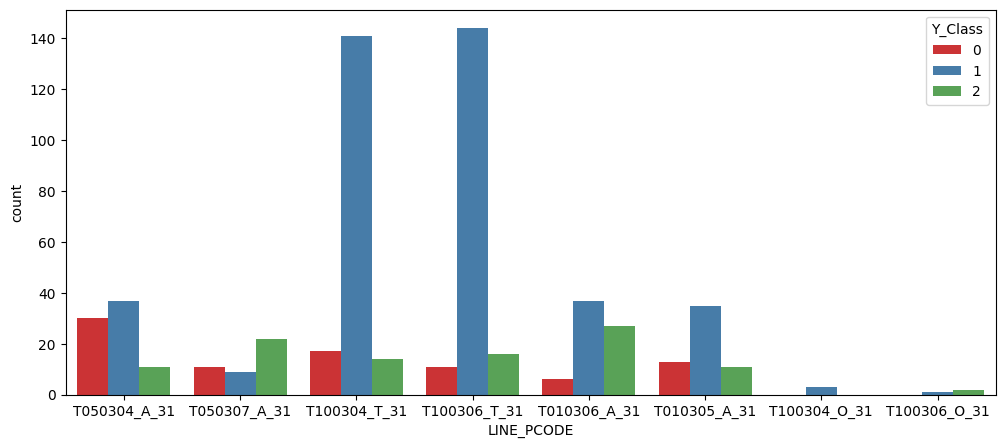

In [10]:
plt.figure(figsize=(12,5))
sns.countplot(data=train_df, x='LINE_PCODE', hue='Y_Class', palette='Set1')
plt.xlabel('LINE_PCODE',fontsize=10)

Text(0.5, 0, 'LINE')

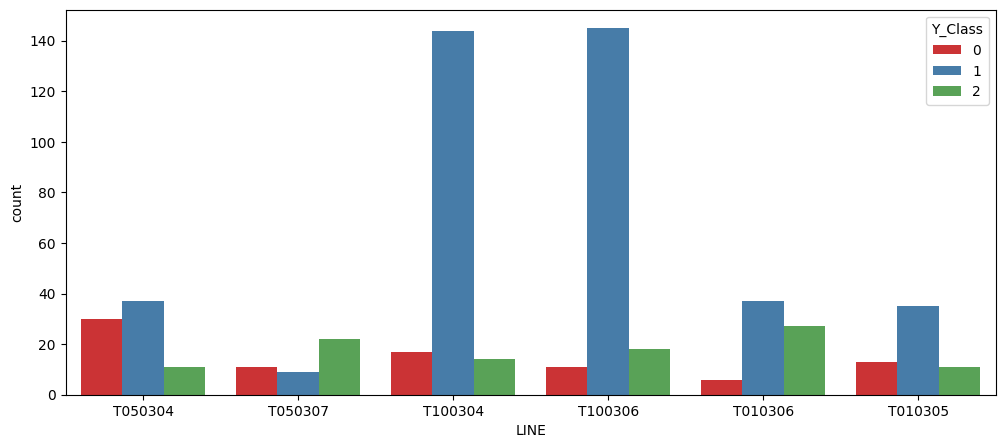

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(data=train_df, x='LINE', hue='Y_Class', palette='Set1')
plt.xlabel('LINE',fontsize=10)

Text(0.5, 0, 'PRODUCT_CODE')

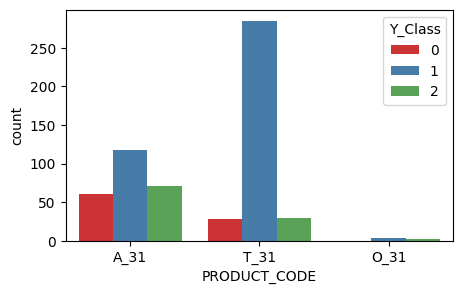

In [12]:
plt.figure(figsize=(5,3))
sns.countplot(data=train_df, x='PRODUCT_CODE', hue='Y_Class', palette='Set1')
plt.xlabel('PRODUCT_CODE',fontsize=10)

Y_Quality

<Axes: >

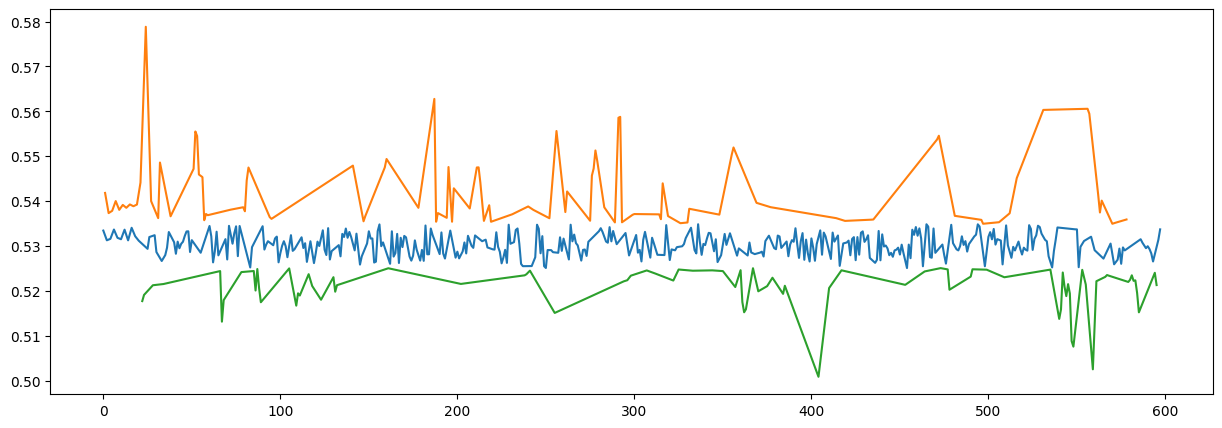

In [13]:
# 전체 Y_Quality 체크
Y_1 = train_df[train_df['Y_Class']==1]['Y_Quality']
Y_2 = train_df[train_df['Y_Class']==2]['Y_Quality']
Y_0 = train_df[train_df['Y_Class']==0]['Y_Quality']

Y_1.plot(figsize=(15,5))
Y_2.plot(figsize=(15,5))
Y_0.plot(figsize=(15,5))

T010305


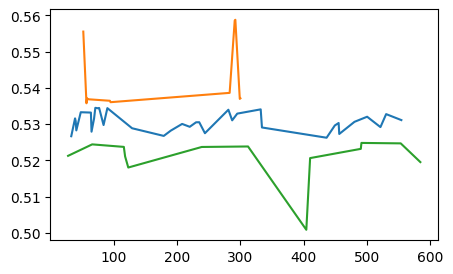

T010306


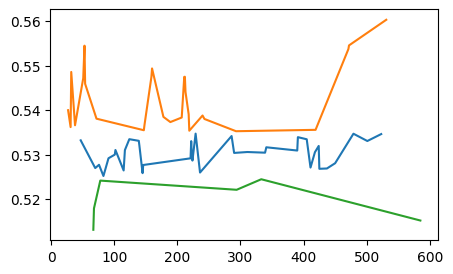

T050304


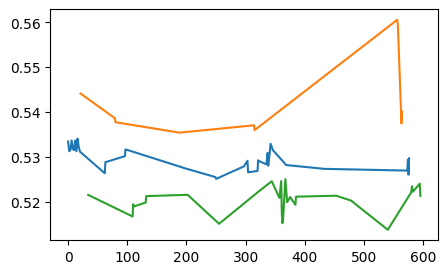

T050307


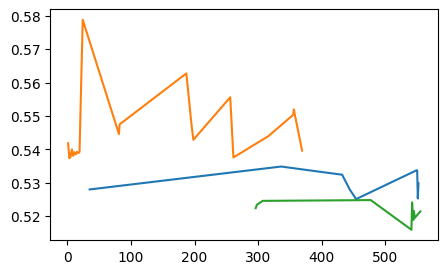

T100304


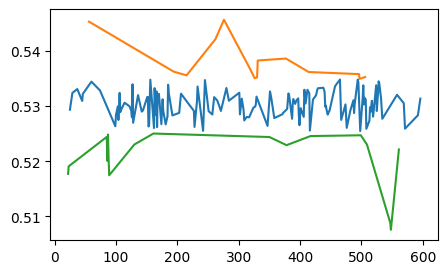

T100306


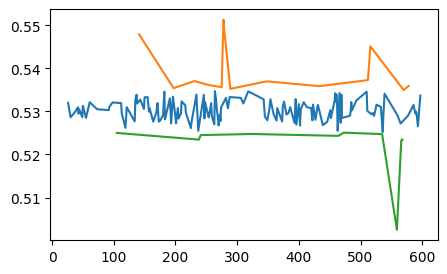

In [14]:
# LINE별 Y_Quality 그래프
for line in sorted(train_df['LINE'].unique()):
  tmp = train_df[train_df['LINE']==line]
  print(line)
  Y_0 = tmp[tmp['Y_Class']==0]['Y_Quality'] # 미달
  Y_1 = tmp[tmp['Y_Class']==1]['Y_Quality'] # 정상
  Y_2 = tmp[tmp['Y_Class']==2]['Y_Quality'] # 초과

  Y_1.plot(figsize=(5,3))
  Y_2.plot(figsize=(5,3))
  Y_0.plot(figsize=(5,3))
  plt.show()

A_31


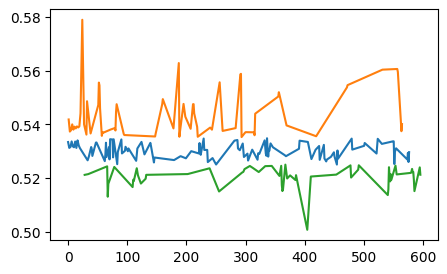

O_31


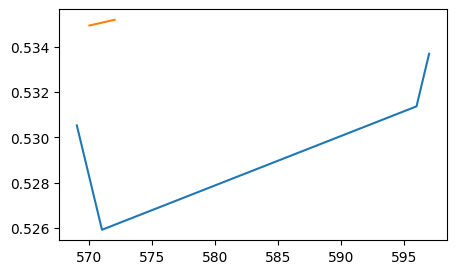

T_31


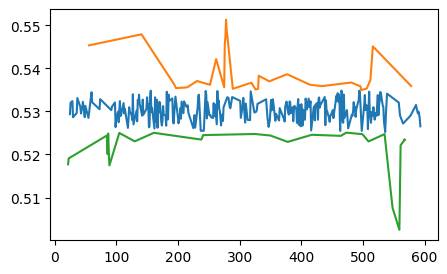

In [15]:
# PRODUCT_CODE별 Y_Quality 그래프
for code in sorted(train_df['PRODUCT_CODE'].unique()):
  tmp = train_df[train_df['PRODUCT_CODE']==code]
  print(code)
  Y_0 = tmp[tmp['Y_Class']==0]['Y_Quality'] # 미달
  Y_1 = tmp[tmp['Y_Class']==1]['Y_Quality'] # 정상
  Y_2 = tmp[tmp['Y_Class']==2]['Y_Quality'] # 초과

  Y_1.plot(figsize=(5,3))
  Y_2.plot(figsize=(5,3))
  Y_0.plot(figsize=(5,3))
  plt.show()

T010305 - A_31


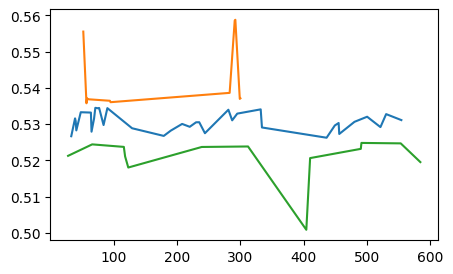

T010306 - A_31


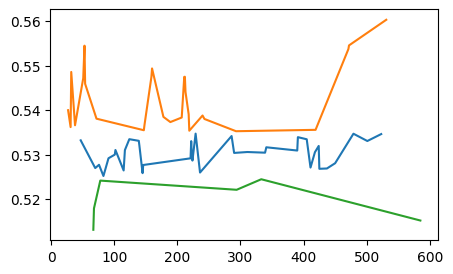

T050304 - A_31


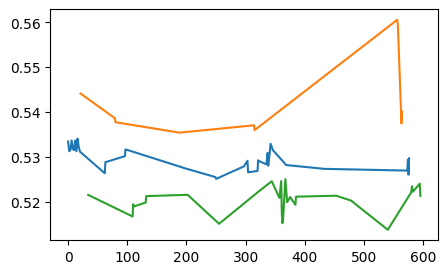

T050307 - A_31


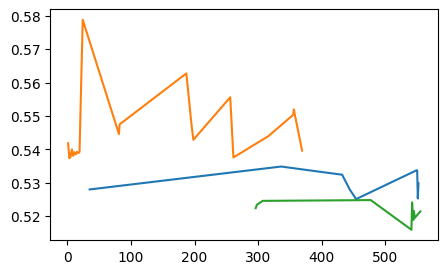

T100304 - O_31


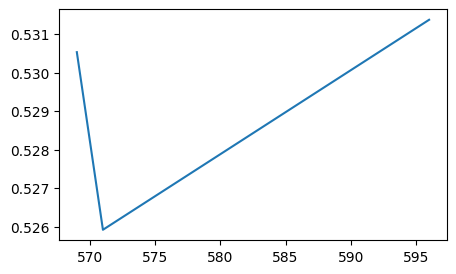

T100304 - T_31


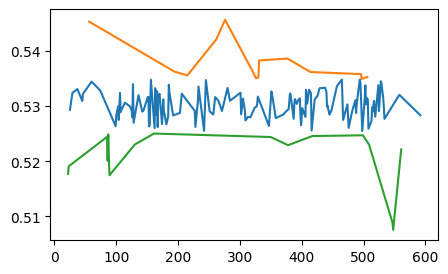

T100306 - O_31


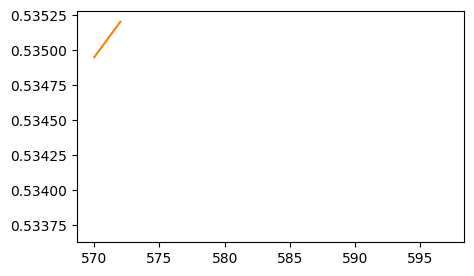

T100306 - T_31


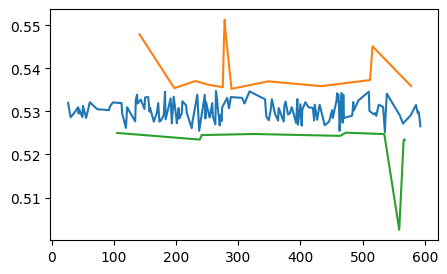

In [16]:
# LINE 별 PRODUCT_CODE 별 그래프
for line in sorted(train_df['LINE'].unique()):
  for code in sorted(train_df['PRODUCT_CODE'].unique()):
    tmp = train_df[(train_df['LINE']==line) & (train_df['PRODUCT_CODE']==code)]
    if len(tmp) != 0:
      print(f"{line} - {code}")
      Y_0 = tmp[tmp['Y_Class']==0]['Y_Quality'] # 미달
      Y_1 = tmp[tmp['Y_Class']==1]['Y_Quality'] # 정상
      Y_2 = tmp[tmp['Y_Class']==2]['Y_Quality'] # 초과

      Y_1.plot(figsize=(5,3))
      Y_2.plot(figsize=(5,3))
      Y_0.plot(figsize=(5,3))
      plt.show()

In [17]:
# PRODUCT_CODE별 임계값 -> 제품에 따라 품질을 분류하는 기준이 다를거라 생각
threshold = {}
i = 0
for code in sorted(train_df['PRODUCT_CODE'].unique()):
  tmp = train_df[train_df['PRODUCT_CODE']==code]
  Y_0 = tmp[tmp['Y_Class']==0]['Y_Quality'] # 미달
  Y_1 = tmp[tmp['Y_Class']==1]['Y_Quality'] # 정상
  Y_2 = tmp[tmp['Y_Class']==2]['Y_Quality'] # 초과

  # 0의 최대, 1의 최소, 1의 최대, 2의 최소
  threshold[i] = [Y_0.max(),Y_1.min(),Y_1.max(),Y_2.min()]
  i += 1

# [0의 최대, 1의 최소, 1의 최대, 2의 최소] -> 임계값이 다 다름
for k, v in zip(np.unique(train_df['PRODUCT_CODE']),threshold.values()):
  print(k,v)

A_31 [0.525046032, 0.525085714, 0.534842857, 0.535279365]
O_31 [nan, 0.525915873, 0.533701587, 0.534950794]
T_31 [0.525066667, 0.5252126979999999, 0.5348365079999999, 0.534950794]


시간별 Y_Quality

In [18]:
def Time_trans(x):
  h = x.split(" ")[1].split(":")[0] # 시각
  m = x.split(" ")[1].split(":")[1] # 분
  x = int(h)*60 + int(m)  # 경과시간(분)
  return x

In [19]:
# 파생변수 생성
train_df['Time'] = train_df['TIMESTAMP'].apply(Time_trans)

test_df['Time'] = train_df['TIMESTAMP'].apply(Time_trans)

<Axes: xlabel='Time'>

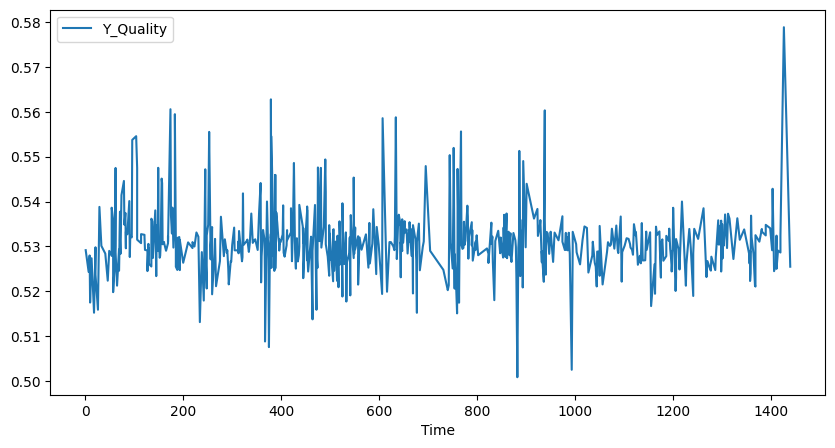

In [20]:
# 시간 경과에 따른 Y_Quality
train_df.sort_values(by='Time').plot(x='Time',y='Y_Quality', figsize=(10,5))

Text(0.5, 0, 'Time')

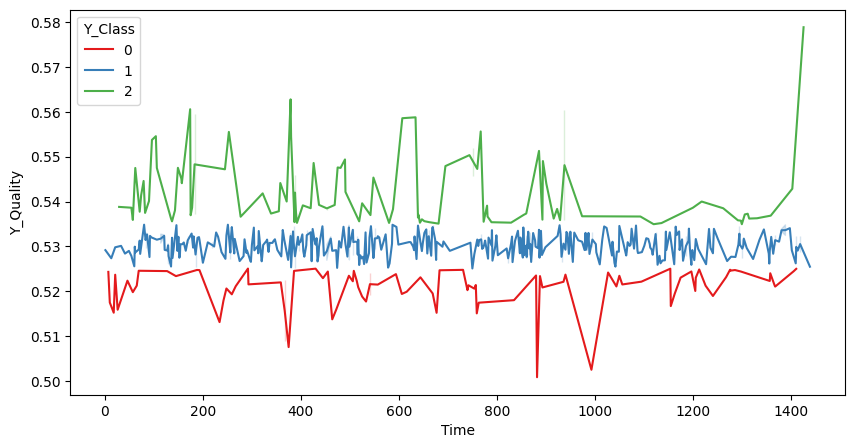

In [21]:
plt.figure(figsize=(10,5))
sns.lineplot(data=train_df, x='Time', y='Y_Quality', hue='Y_Class', palette='Set1')
plt.xlabel('Time',fontsize=10)

#### 결측치

In [22]:
# 라인별 모두 결측치인 feature
LINE = ['T050304', 'T050307', 'T100304', 'T100306', 'T010306', 'T010305']
train_nan_col = {}
for line in LINE:
  tmp = train_df.groupby('LINE').get_group(line)
  tmp_col = []
  for col in tmp.columns[2:]:
    if tmp[col].isna().sum() == len(tmp.index):
      tmp_col.append(col)
  train_nan_col[line] = tmp_col

for k, v in train_nan_col.items():
  print(f"{k} - {len(v)}개")

# T050304/T050307, T100304/T100306, T010306/T010305 -> 라인끼리 비슷함

T050304 - 907개
T050307 - 900개
T100304 - 2204개
T100306 - 2204개
T010306 - 1989개
T010305 - 1989개


In [22]:
nan_col = []
var_col = []
for feature in train_df.columns:
  if train_df[feature].isna().sum() == 598:       # 결측치만 있는 feature
    nan_col.append(feature)
  elif len(train_df[feature].value_counts())==1:  # 값이 하나인 feature
    var_col.append(feature)

print(f"결측치만 있는 feature : {len(nan_col)}개")
print(f"값이 하나인 feature : {len(var_col)}개")

결측치만 있는 feature : 82개
값이 하나인 feature : 377개


  ## Pre-processing

In [23]:
# 회귀모델을 위한 전처리
train_x = train_df.drop(columns=['PRODUCT_ID','TIMESTAMP','Y_Class','Y_Quality'])
test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

train_y = train_df['Y_Quality']

In [24]:
train_x.shape, test_x.shape

((598, 2879), (310, 2879))

In [25]:
# 결측치만 있는 feature 제거 - 82개
train_x = train_x.drop(columns=nan_col)
test_x = test_x.drop(columns=nan_col)

# 값이 1개인 feature 제거 - 377개
train_x = train_x.drop(columns=var_col)
test_x = test_x.drop(columns=var_col)

In [26]:
train_x.shape, test_x.shape

((598, 2420), (310, 2420))

In [27]:
# 결측치 0으로 변경
train_x = train_x.fillna(0)
test_x = test_x.fillna(0)

In [28]:
# 범주형으로 변경
qual_col = ['LINE', 'PRODUCT_CODE', 'LINE_PCODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])

    for label in np.unique(test_x[i]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i])
print('Done.')

Done.


## Modeling
Regressor + Classifier

### Regressor

In [ ]:
!pip install catboost

In [30]:
from catboost import CatBoostRegressor, CatBoostClassifier
from xgboost import XGBRegressor, XGBClassifier

from sklearn.metrics import mean_squared_error, f1_score
from sklearn.model_selection import train_test_split

Optuna

In [ ]:
!pip install optuna

In [ ]:
import optuna
from optuna.samplers import TPESampler

In [31]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=37)

In [ ]:
def objective(trial):

    params = {
        'depth': trial.suggest_int('depth',2, 10),
        'iterations':trial.suggest_int("iterations", 1000, 5000),
        'learning_rate' : trial.suggest_float('learning_rate',0.05, 0.5),
        'od_wait':trial.suggest_int('od_wait', 500, 2000),
        'reg_lambda': trial.suggest_float('reg_lambda',1e-5,100),
        'random_strength': trial.suggest_float('random_strength',10,50),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,20),
        'bagging_temperature' :trial.suggest_float('bagging_temperature', 0.01, 100.00,log=True),
        'colsample_bylevel':trial.suggest_float('colsample_bylevel', 0.4, 1.0)
    }

    model = CatBoostRegressor(**params, random_seed=37)
    model = model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0, early_stopping_rounds=100)
    y_pred = model.predict(X_val)

    MSE = mean_squared_error(y_val, y_pred)
    return MSE

study = optuna.create_study(direction='minimize', sampler=TPESampler(seed=37))
study.optimize(objective, n_trials = 30)

In [ ]:
BEST_trial = study.best_trial
BEST_trial_params = BEST_trial.params
print(f"Best Trial Score : {BEST_trial.value}")
params = BEST_trial_params
params

Best Trial Score : 1.8404812610233245e-05


{'depth': 2,
 'iterations': 2861,
 'learning_rate': 0.20158291329246458,
 'od_wait': 1303,
 'reg_lambda': 93.67916040352515,
 'random_strength': 45.0621859976616,
 'min_data_in_leaf': 23,
 'leaf_estimation_iterations': 10,
 'bagging_temperature': 6.54037456561875,
 'colsample_bylevel': 0.4232328080605074}

In [32]:
params = {'depth': 2,
 'iterations': 2861,
 'learning_rate': 0.20158291329246458,
 'od_wait': 1303,
 'reg_lambda': 93.67916040352515,
 'random_strength': 45.0621859976616,
 'min_data_in_leaf': 23,
 'leaf_estimation_iterations': 10,
 'bagging_temperature': 6.54037456561875,
 'colsample_bylevel': 0.4232328080605074}

 Strarified KFold

In [33]:
from sklearn.model_selection import StratifiedKFold

In [35]:
SKF = StratifiedKFold(n_splits=10, shuffle=True, random_state=37)
MODEL = CatBoostRegressor(**params, random_seed=37)
CB_preds_R = 0

for i, (train_idx, val_idx) in enumerate(SKF.split(train_x, train_df['Y_Class'])):

    x_train = train_x.iloc[train_idx]
    x_val = train_x.iloc[val_idx]

    y_train = train_y.iloc[train_idx]
    y_val = train_y.iloc[val_idx]
    print(f"===== n_splits {i+1} =====")

    # CatBoost
    MODEL.fit(x_train, y_train, eval_set=[(x_val, y_val)], verbose=200, early_stopping_rounds=200)
    CB_preds_R += MODEL.predict(test_x)/10

===== n_splits 1 =====
0:	learn: 0.0073583	test: 0.0076573	best: 0.0076573 (0)	total: 11ms	remaining: 31.6s
200:	learn: 0.0024950	test: 0.0042659	best: 0.0042576 (197)	total: 2.13s	remaining: 28.2s
400:	learn: 0.0014711	test: 0.0040729	best: 0.0040260 (357)	total: 4.26s	remaining: 26.1s
600:	learn: 0.0009754	test: 0.0039935	best: 0.0039935 (600)	total: 7.18s	remaining: 27s
800:	learn: 0.0006473	test: 0.0039990	best: 0.0039617 (722)	total: 9.37s	remaining: 24.1s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.003961723056
bestIteration = 722

Shrink model to first 723 iterations.
===== n_splits 2 =====
0:	learn: 0.0073592	test: 0.0067728	best: 0.0067728 (0)	total: 10.6ms	remaining: 30.4s
200:	learn: 0.0026063	test: 0.0042848	best: 0.0042848 (200)	total: 2.11s	remaining: 28s
400:	learn: 0.0016402	test: 0.0042163	best: 0.0042005 (394)	total: 4.24s	remaining: 26s
600:	learn: 0.0010332	test: 0.0042136	best: 0.0041453 (420)	total: 6.46s	remaining: 24.3s
Stopped by overfi

### Classifier

In [36]:
# 분류모델을 위한 전처리
train_y = train_df['Y_Class']

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2,
                                                  random_state=37, stratify=train_df["Y_Class"])

In [ ]:
# 불균형 클래스를 위한 가중치
# from sklearn.utils.class_weight import compute_class_weight

# weights = compute_class_weight(class_weight = "balanced" ,
#                      classes=np.unique(train_df['Y_Class']),
#                      y = train_df['Y_Class'])
# weights

array([2.26515152, 0.48976249, 1.93527508])

In [37]:
SKF = StratifiedKFold(n_splits=10, shuffle=True, random_state=37)
# Model
CB_model = CatBoostClassifier(depth=5, iterations=1000, learning_rate=0.05, random_seed=37)
XGB_model = XGBClassifier(max_depth=5, n_estimators=5000, random_state=37)
XGB_model.set_params(early_stopping_rounds=500)

CB_preds_C = 0
CB_best_score = 0

XGB_preds_C = 0
sum_preds = 0

for i, (train_idx, val_idx) in enumerate(SKF.split(train_x, train_df['Y_Class'])):

    x_train = train_x.iloc[train_idx]
    x_val = train_x.iloc[val_idx]

    y_train = train_y.iloc[train_idx]
    y_val = train_y.iloc[val_idx]

    print(f"===== n_splits {i} =====")

    # CatBoost
    CB_model.fit(x_train, y_train, early_stopping_rounds=100, eval_set=(x_val,y_val), verbose=200)
    CB_preds_C += CB_model.predict_proba(test_x)/10
    CB_best_score += CB_model.best_score_['validation']['MultiClass']/10

    #XGBoost
    XGB_model.fit(x_train, y_train, eval_set=[(x_val, y_val)], verbose=200)
    XGB_preds_C += XGB_model.predict_proba(test_x)/10

    sum_preds += CB_model.predict_proba(test_x)/20 + XGB_model.predict_proba(test_x)/20

===== n_splits 0 =====
0:	learn: 1.0630588	test: 1.0607803	best: 1.0607803 (0)	total: 239ms	remaining: 3m 58s
200:	learn: 0.4514643	test: 0.5595463	best: 0.5595463 (200)	total: 34s	remaining: 2m 14s
400:	learn: 0.2818794	test: 0.4999477	best: 0.4997752 (399)	total: 1m 8s	remaining: 1m 42s
600:	learn: 0.1909469	test: 0.4799290	best: 0.4790030 (582)	total: 1m 43s	remaining: 1m 8s
800:	learn: 0.1400530	test: 0.4629219	best: 0.4629219 (800)	total: 2m 17s	remaining: 34.2s
999:	learn: 0.1069815	test: 0.4539384	best: 0.4539384 (999)	total: 2m 50s	remaining: 0us

bestTest = 0.4539384368
bestIteration = 999

[0]	validation_0-mlogloss:0.90267
[200]	validation_0-mlogloss:0.64647
[400]	validation_0-mlogloss:0.69233
[533]	validation_0-mlogloss:0.70683
===== n_splits 1 =====
0:	learn: 1.0611938	test: 1.0619352	best: 1.0619352 (0)	total: 228ms	remaining: 3m 47s
200:	learn: 0.4425096	test: 0.6469842	best: 0.6448642 (197)	total: 33.9s	remaining: 2m 14s
400:	learn: 0.2633638	test: 0.6061697	best: 0.6059

In [38]:
# 제품코드별 임계값
def trans(qual, code):
  if qual <= threshold[code][0]:
    qual = 0
  elif qual >= threshold[code][3]:
    qual = 2
  else:
    qual = 1
  return qual

In [41]:
RESULT = test_x[['LINE','PRODUCT_CODE']]

# CatBoost
CB_data = pd.DataFrame(CB_preds_C, columns=['CB_0','CB_1','CB_2'])
CB_data['CB_Cls_label'] = CB_preds_C.argmax(1)
CB_data['CB_Quality'] = CB_preds_R
CB_data['CB_Reg_label']=[0]*len(test_x)
for code in range(len(np.unique(test_x['PRODUCT_CODE']))):
  idx = test_x.loc[test_x["PRODUCT_CODE"]==code].index
  CB_data.loc[idx,"CB_Reg_label"] = CB_data.loc[idx,"CB_Quality"].apply(lambda x: trans(x, code))

# XGB
XGB_data = pd.DataFrame(XGB_preds_C, columns=['XGB_0','XGB_1','XGB_2'])
XGB_data['XGB_Cls_label'] = XGB_preds_C.argmax(1)
#XGB_data['XGB_quality'] = XGB_preds_R
# XGB_data['XGB_Reg_label']=[0]*len(test_x)
# for code in range(len(np.unique(test_x['PRODUCT_CODE']))):
#   idx = test_x.loc[test_x["PRODUCT_CODE"]==code].index
#   XGB_data.loc[idx,"XGB_Reg_label"] = XGB_data.loc[idx,"XGB_quality"].apply(lambda x: trans(x,code))

RESULT = pd.concat([RESULT,CB_data, XGB_data],axis=1)

# CB+XGB
RESULT['SUM'] = sum_preds.argmax(1)
RESULT

,LINE,PRODUCT_CODE,CB_0,CB_1,CB_2,CB_Cls_label,CB_Quality,CB_Reg_label,XGB_0,XGB_1,XGB_2,XGB_Cls_label,SUM
0,5,2,0.072372,0.859852,0.067777,1,0.529126,1,0.067760,0.871270,0.060970,1,1
1,4,2,0.096035,0.510028,0.393937,1,0.532516,1,0.125929,0.541081,0.332990,1,1
2,4,2,0.082570,0.684740,0.232690,1,0.532041,1,0.078775,0.656689,0.264536,1,1
3,0,0,0.201837,0.716775,0.081388,1,0.524985,0,0.224962,0.701373,0.073664,1,1
4,1,0,0.119252,0.684164,0.196584,1,0.532414,1,0.147661,0.685770,0.166569,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,5,2,0.087345,0.815214,0.097440,1,0.527002,1,0.169130,0.647734,0.183136,1,1
306,4,2,0.106613,0.805804,0.087583,1,0.525001,0,0.181040,0.684219,0.134741,1,1
307,5,2,0.092167,0.816539,0.091294,1,0.527224,1,0.157335,0.678054,0.164610,1,1
308,5,2,0.104285,0.784877,0.110838,1,0.526954,1,0.152532,0.673893,0.173575,1,1


In [42]:
threshold

{0: [0.525046032, 0.525085714, 0.534842857, 0.535279365],
 1: [nan, 0.525915873, 0.533701587, 0.534950794],
 2: [0.525066667, 0.5252126979999999, 0.5348365079999999, 0.534950794]}

In [43]:
print(len(RESULT[(RESULT["CB_Cls_label"] != RESULT["CB_Reg_label"])]))
RESULT[(RESULT["CB_Cls_label"] != RESULT["CB_Reg_label"])]

37


,LINE,PRODUCT_CODE,CB_0,CB_1,CB_2,CB_Cls_label,CB_Quality,CB_Reg_label,XGB_0,XGB_1,XGB_2,XGB_Cls_label,SUM
3,0,0,0.201837,0.716775,0.081388,1,0.524985,0,0.224962,0.701373,0.073664,1,1
15,4,2,0.118731,0.812691,0.068578,1,0.523296,0,0.119463,0.765409,0.115128,1,1
28,4,2,0.058151,0.871918,0.069931,1,0.524697,0,0.095166,0.803060,0.101775,1,1
30,4,2,0.047350,0.897516,0.055134,1,0.524956,0,0.062871,0.868344,0.068785,1,1
32,4,2,0.058854,0.827940,0.113206,1,0.525052,0,0.096439,0.768030,0.135530,1,1
36,3,0,0.509943,0.259505,0.230552,0,0.526675,1,0.446587,0.175575,0.377839,0,0
40,0,0,0.359235,0.323028,0.317737,0,0.531379,1,0.325377,0.378466,0.296158,1,1
47,4,2,0.265840,0.659617,0.074544,1,0.517750,0,0.279063,0.668039,0.052898,1,1
49,4,2,0.102935,0.830707,0.066358,1,0.521738,0,0.214634,0.710644,0.074722,1,1
51,4,2,0.048801,0.912167,0.039032,1,0.519909,0,0.103576,0.826225,0.070199,1,1


라벨이 다른 것들 중에 classify에서 확률이 0.5 미만은 quality로 변경

In [50]:
tmp = RESULT[(RESULT["CB_Cls_label"] != RESULT["CB_Reg_label"])]
tmp['check'] = tmp.loc[:,['CB_0','CB_1','CB_2']].max(axis=1)
idx = tmp[(tmp['check'] < 0.5)].index

RESULT.loc[idx,:]

<ipython-input-50-c54932ccd3fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['check'] = tmp.loc[:,['CB_0','CB_1','CB_2']].max(axis=1)


,LINE,PRODUCT_CODE,CB_0,CB_1,CB_2,CB_Cls_label,CB_Quality,CB_Reg_label,XGB_0,XGB_1,XGB_2,XGB_Cls_label,SUM
40,0,0,0.359235,0.323028,0.317737,0,0.531379,1,0.325377,0.378466,0.296158,1,1
52,2,0,0.498959,0.369009,0.132032,0,0.525108,1,0.614118,0.264813,0.121069,0,0
61,2,0,0.380781,0.395061,0.224158,1,0.524931,0,0.435945,0.412257,0.151797,0,0
132,3,0,0.377750,0.460810,0.161440,1,0.524233,0,0.510995,0.158206,0.330799,0,0
147,4,2,0.160233,0.392752,0.447015,2,0.533947,1,0.153288,0.441939,0.404772,1,2
249,3,0,0.478591,0.287606,0.233803,0,0.527573,1,0.536229,0.143410,0.320360,0,0
255,3,0,0.449895,0.373806,0.176299,0,0.526806,1,0.339549,0.220888,0.439563,2,0
260,3,0,0.294083,0.332080,0.373837,2,0.533361,1,0.175753,0.272592,0.551655,2,2
263,3,0,0.431931,0.427399,0.140670,0,0.528212,1,0.221298,0.358676,0.420026,2,1
280,3,0,0.493076,0.353327,0.153596,0,0.525911,1,0.317216,0.355663,0.327121,1,0


In [51]:
RESULT.loc[idx, 'CB_Cls_label'] = RESULT.loc[idx, 'CB_Reg_label']

## Submit

In [61]:
submit = pd.read_csv('./sample_submission.csv')

In [62]:
submit['Y_Class'] = RESULT['SUM']

In [63]:
submit['Y_Class'].value_counts()

Y_Class
1    268
0     37
2      5
Name: count, dtype: int64

In [58]:
submit.to_csv('./submission.csv', index=False)